In [27]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [14]:
engine = create_engine("sqlite:///Resources//hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [16]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract


# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6)

In [17]:
#  3. Convert the June temperatures to a list.
june_temps = june_temps.all()
# june_temps

In [18]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=['date', 'June Temps'])

In [19]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [20]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
decem_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12)

In [21]:
# 7. Convert the December temperatures to a list.
decem_temps = decem_temps.all()
# decem_temps

In [22]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
decem_temps_df = pd.DataFrame(decem_temps, columns=['date', 'December Temps'])

In [23]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
decem_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### June Precipitation

In [31]:
june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
# june_prcp

In [33]:
june_prcp_df = pd.DataFrame(june_prcp, columns=['date', 'June Precipitation'])
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


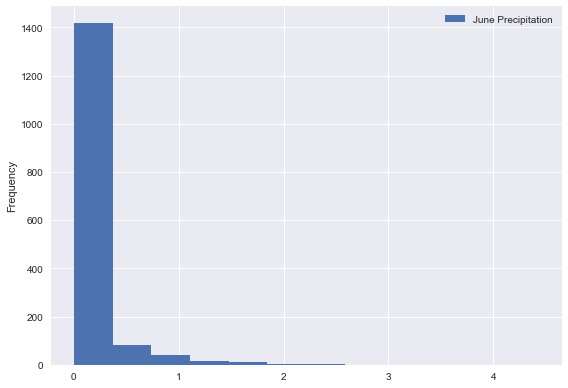

In [34]:
june_prcp_df.plot.hist(bins=12)
plt.tight_layout()

### December Precipitation

In [36]:
dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()

In [37]:
dec_prcp_df = pd.DataFrame(dec_prcp, columns=['date', 'December Precipitation'])
dec_prcp_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


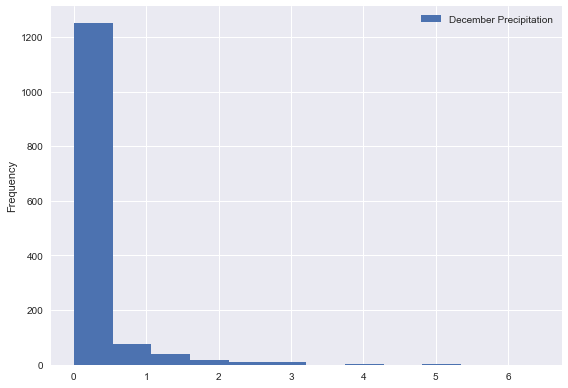

In [38]:
dec_prcp_df.plot.hist(bins=12)
plt.tight_layout()